In [22]:
import requests
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def find_bigrams(lst):
    return zip(*(lst[i:] for i in range(2)))

In [4]:
txt = requests.get("https://projecteuler.net/project/resources/p079_keylog.txt").text.split("\n")

In [8]:
codes = list(filter(bool, txt))

In [15]:
allNodes = set(itertools.chain(*codes))

In [28]:
G=nx.DiGraph()

for node in allNodes:
    G.add_node(node)

for code in codes:
    for a,b in find_bigrams(code):
        G.add_edge(a, b)

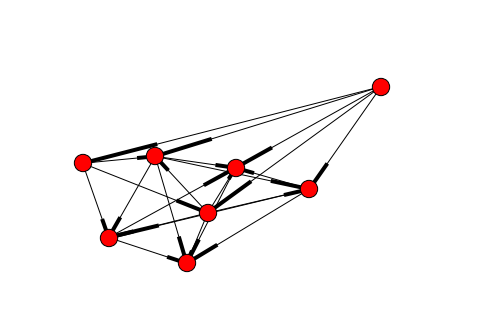

In [31]:
%matplotlib inline
nx.draw(G)

In [51]:
G2 = G.copy()

def getNextCodepoint(G):
    for node, indeg in G.in_degree_iter():
        if indeg == 0:
            G.remove_node(node)
            return node
    return None

"".join(getNextCodepoint(G2) for i in range(G.number_of_nodes()))

'73162890'